# MNIST

The MNIST database is a collection of handwritten images which are used to train a neural network to recognize digits from a paper. MNIST also provides a database for testing the neural network.

The training imeages file contains 60000 images and the test images file contains 10000 images. These files are in a special format therefore they have to be read byte by byte. 


In [126]:
# Gzip for unzipping the downloaded file
import gzip
# Io for file reading
import io
# Urlopen for downloading the fiel
from urllib.request import urlopen
#Import numpy for creating the base array
import numpy as np
#Inline complant for jupyter compatibility
%matplotlib inline 
#Import matplotlib 
from matplotlib import pyplot as plt

# Read the training image file
The file has to be read as big endian. The first four bite is the magic number which identifies the fyle type.
The data in this file is a 3 dimensional array:
* Bytes 4 to 8 is the number of pictures in the datatset (The size of the outer array)
* Bytes 8 to 12 is the number of rows (Size of the middle array) 
* Bytes 12 to 16 is the number of collumns (Size of the last array)
* From byte 16 until the end of the file are the pizels of the picures.

### Open the file

There is two ways are provided to aquire the file and its content:

#### Open a local file with gzip
This cell is commented out and here for presentation purposes. The file should be loaded only one way.

In [127]:
#https://docs.python.org/3/library/gzip.html

#import gzip

#Unzip the training images

#with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    
#    file_content = f.read()
    
#print('File read in')

#### Open a url to download the file and open the downloaded gzip file

In [128]:
#https://stackoverflow.com/questions/2695152/in-python-how-do-i-decode-gzip-encoding
#It is a modified version of Michal Niklas's answer
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    train_image_file_content = f.read()
print('File read in')

File read in


### Do byte confirmation and read the first 16 bytes

In [129]:
#Confirm if the first four byteis 2051
is_it_the_right_bytes=int.from_bytes(train_image_file_content[0:4], byteorder='big')==2051
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [130]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
pictures_number=int.from_bytes(train_image_file_content[4:8], byteorder='big')
print('Number of pictures: %d' % pictures_number)

Number of pictures: 60000


In [131]:
#Number of rows should be from 8 to 12
rows_number=int.from_bytes(train_image_file_content[8:12], byteorder='big')
print ('Number of rows: %d' % rows_number)

Number of rows: 28


In [132]:
#Number of columns should be from 12 to 16
columns_number=int.from_bytes(train_image_file_content[12:16], byteorder='big')
print ('Number of columns: %d' % columns_number)

Number of columns: 28


The pixels are from byte 16 until the end of the file. Each 784 batch is a picture(28*28)


### Read the data into an array

The esiest way to read the bytes is to do a while loop. The loop has to start from position 16 as until this position the bytes are set for metadata purpose. 

The while loop should run until the last byte is consumed, therefore it runs until the size of the ```file_content``` byte array.

The iteration step is the size of the number of columns in a picture array: 28.

Slices of bytes are taken and converted to int at each iteration from ```file_content```. This converted array is added to a row and the row counter is updated. 

Once a the row counter exceeds the size of pixel rows of each pixel it is reset to the first row and the picture counter is increased by one.

In [133]:
#Function taking the file content,number of pictures, number of columns, number of rows and the starting offset
#It converst the file content byte by byte into an int and collects it into a 3D array and returns the array
def load_pictures_to_array(file_content,pictures_number,columns_number,rows_number,offset):
    # Set up an array for picture storage
    pictures=np.zeros((pictures_number,rows_number,columns_number),dtype=int)
    #The current row a picture 1-28
    current_row=1
    #The current picture 1-59999
    current_image=0
    #The iteration index
    i=offset
    #Run a loop until the end of the byte array    
    while i<len(file_content):
        #Convert a row to int types
        a=np.frombuffer(file_content[i:i+columns_number],dtype=np.uint8)
        #Set the row the current picture
        pictures[current_image][current_row-1]=a
        #Go to next row
        current_row+=1
        #If the current row is the same as the size of the rows
        if(current_row>rows_number):
            #Set the row to number 1
            current_row=1
            #Go to the next picture
            current_image+=1
        #Increase the counter with the size of the columns    
        i+=columns_number
    return pictures

In [134]:
#Import time for the speed measurement
import time

#Print out the size of file_content
print('Original content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Read pictures into an array
training_pictures = load_pictures_to_array(train_image_file_content,pictures_number,columns_number,rows_number,16)

#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))


Original content length:10008
Run for 2.616062879562378 seconds.


### Confirm data

To confirm the data was read in correctly, ```matplotlib``` can be used. This library can plot an array of pixels as a picture.

Three different item can be printed from three different position of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three pictures are numbers at the same position on the picture, that means the reading was succesful and there wasn't shifting in the rows or columns.

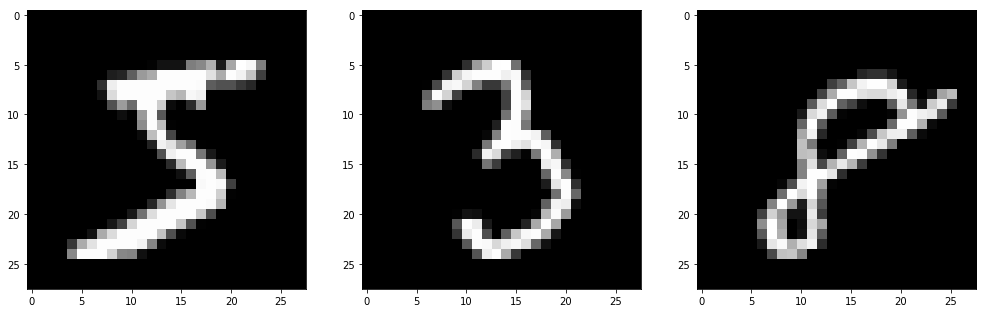

In [135]:
#Create figure
fig = plt.figure(figsize=(17,8))
#Set pyplot to gray scale as the pixels are 0 to 255 on graye scale
plt.gray()
p=fig.add_subplot(131)
#Plot the first image
p.imshow(training_pictures[0], interpolation='nearest')
#Plot the middle image
p2=fig.add_subplot(132)
p2.imshow(training_pictures[30000], interpolation='nearest')
#Plot the last image
p3=fig.add_subplot(133)
p3.imshow(training_pictures[59999], interpolation='nearest')

# Read the labels for the training images
The file has to be read as big endian. The first four bite is the magic number which identifies the fyle type.
The data in this file is an array:
* Bytes 5 to 8 is the number of labels in the datatset (The size of the outer array)
* From byte 9 until the end of the file each byte is a label.

### Open the file

In [136]:
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    #Overides the previously used file_content
    train_label_file_content = f.read() 
print('File read in')

File read in


### Do byte confirmation and read the first 8 bytes

In [137]:
#Confirm if the first four byteis 2049
is_it_the_right_bytes=int.from_bytes(train_label_file_content[0:4], byteorder='big')==2049
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [138]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
label_number=int.from_bytes(train_label_file_content[4:8], byteorder='big')
print('Number of Labels: %d' % label_number)

Number of Labels: 60000


### Read the data into an array

The reading happens the same way as the reading of pictures. This time a simple int array is loaded in.

In [139]:
#Function taking the file content,number of labels, and the starting offset
#It converst the file content byte by byte into an int and collects it into an array and returns the array
def load_labels_to_array(file_content,label_number,offset=0):
    # Collect the files into an array.
    labels=np.frombuffer(file_content[offset:label_number+offset],dtype=np.uint8)
    return labels

In [140]:
#Print out the size of file_content
print('Origonal content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Convert label bytes to numbers and collect to an array
training_labels=load_labels_to_array(train_label_file_content,label_number,8)
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))

Origonal content length:10008
Run for 0.0 seconds.


### Confirm data

To confirm the data was read in correctly, the same indexes should be checked in the label array as in the training picture array:

Three different item can be printed from three different positions of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three numbers are the same numbers as the pictures presented above then the conversion was succesful.

In [141]:
print("Number of labels: %d" % len(training_labels))
print("Label at index 0: %d" % training_labels[0])
print("Label at index 30000: %d" % training_labels[30000])
print("Label at index 59999: %d" % training_labels[59999])

Number of labels: 60000
Label at index 0: 5
Label at index 30000: 3
Label at index 59999: 8


# Read the test image file
This file is the same format as the training image file.
The data in this file is a 3 dimensional array:
* Bytes 4 to 8 is the number of pictures in the datatset (The size of the outer array)
* Bytes 8 to 12 is the number of rows (Size of the middle array) 
* Bytes 12 to 16 is the number of collumns (Size of the last array)
* From byte 16 until the end of the file are the pizels of the picures.

### Open the file

#### Open a url to download the file and open the downloaded gzip file

In [142]:
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    #Overides the previously used file_content
    test_image_file_content = f.read()
print('File read in')

File read in


### Do byte confirmation and read the first 16 bytes

In [143]:
#Confirm if the first four byteis 2051
is_it_the_right_bytes=int.from_bytes(test_image_file_content[0:4], byteorder='big')==2051
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [144]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
test_pictures_number=int.from_bytes(test_image_file_content[4:8], byteorder='big')
print('Number of pictures: %d' % test_pictures_number)

Number of pictures: 10000


In [145]:
#Number of rows should be from 8 to 12
test_rows_number=int.from_bytes(test_image_file_content[8:12], byteorder='big')
print ('Number of rows: %d' % test_rows_number)

Number of rows: 28


In [146]:
#Number of columns should be from 12 to 16
test_columns_number=int.from_bytes(test_image_file_content[12:16], byteorder='big')
print ('Number of columns: %d' % test_columns_number)

Number of columns: 28


The pixels are from byte 16 until the end of the file. Each 784 batch is a picture(28*28)


### Read the data into an array

The reading is done with the above defined function the exact same way as the reading of training images.

In [147]:
#Print out the size of file_content
print('Origonal content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Read pictures into an array
test_pictures = load_pictures_to_array(test_image_file_content,test_pictures_number,test_columns_number,test_rows_number,16)
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))


Origonal content length:10008
Run for 0.4337313175201416 seconds.


### Confirm data

To confirm the data was read in correctly, ```matplotlib``` can be used the same way as above with the training data set. 

Three different item can be printed from three different positions of the arrray. 
* The first one at index 0
* The middle one at index 5000
* The last one at index 9999


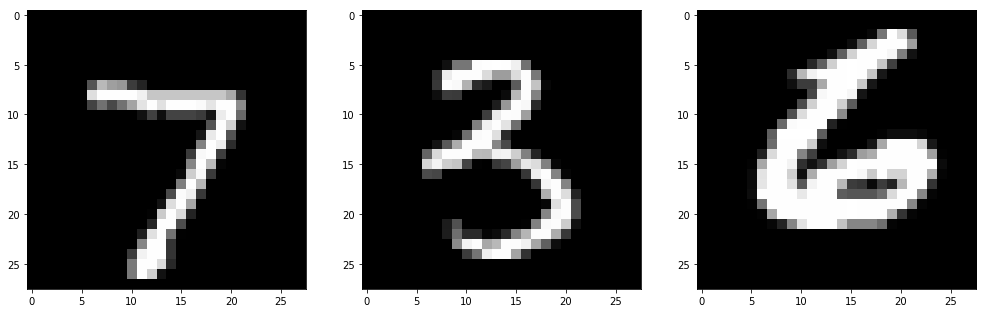

In [148]:
#Create figure
fig = plt.figure(figsize=(17,8))
#Set pyplot to gray scale as the pixels are 0 to 255 on graye scale
plt.gray()
p=fig.add_subplot(131)
#Plot the first image
p.imshow(test_pictures[0], interpolation='nearest')
#Plot the middle image
p2=fig.add_subplot(132)
p2.imshow(test_pictures[5000], interpolation='nearest')
#Plot the last image
p3=fig.add_subplot(133)
p3.imshow(test_pictures[9999], interpolation='nearest')

# Read the labels for the test images
This file is the same format as the training label file.
The data in this file is an array:
* Bytes 5 to 8 is the number of labels in the datatset (The size of the outer array)
* From byte 9 until the end of the file each byte is a label.

### Open the file

In [149]:
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    #Overides the previously used file_content
    test_label_file_content = f.read() 
print('File read in')

File read in


### Do byte confirmation and read the first 8 bytes

In [150]:
#Confirm if the first four byteis 2049
is_it_the_right_bytes=int.from_bytes(test_label_file_content[0:4], byteorder='big')==2049
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [151]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
label_number=int.from_bytes(test_label_file_content[4:8], byteorder='big')
print('Number of Labels: %d' % label_number)

Number of Labels: 10000


### Read the data into an array

The reading is done with the above defined function the exact same way as the reading of training labels.

In [152]:
#Print out the size of file_content
print('Origonal content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Convert label bytes to numbers and collect to an array
test_labels=load_labels_to_array(test_label_file_content,label_number,8)
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))

Origonal content length:10008
Run for 0.0 seconds.


### Confirm data

To confirm the data was read in correctly, the same indexes should be checked in the label array as in the training picture array:

Three different item can be printed from three different positions of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three numbers are the same numbers as the pictures presented above then the conversion was succesful.

In [153]:
print("Number of labels: %d" % len(test_labels))
print("Label at index 0: %d" % test_labels[0])
print("Label at index 30000: %d" % test_labels[5000])
print("Label at index 59999: %d" % test_labels[9999])

Number of labels: 10000
Label at index 0: 7
Label at index 30000: 3
Label at index 59999: 6


# Performance
In this section I compare the different versions of parsing algorihtm I developed with numpy and the example from lecture notes. It is kind of "evolution" of algorithm. 
## New algorithm
The above methods do not perform well. 2.6 seconds for 60000 pictures is slow. In the digit recognition script I optimalized the image and label parsing process.

The new algorithm merges the image and label reading into one loop. At each iteration 784 items are taken from the raw images file and added to the image array, at the same time 1 label is taken from the label file and added to the label array. This process produces faster reading times.

In [154]:
def loadimagesAndLabelsToArrays(image_file_content, images_number: int, columns_number: int, rows_number: int, images_offset: int, label_file_content, labels_offset: int):
        """
        Loads a set of images and labels into two arrays.
        The number of images and labels has to match
        The method does not reads in each image flat as columns_number*rows_number.
        """
        # Set up an array for image storage
        images = np.zeros(
            (images_number, columns_number*rows_number), dtype=float)
        labels = np.zeros(
            (images_number), dtype=int)
        # The current image 1-59999
        current_image = 0
        # The iteration index
        i = images_offset
        print("Converting images and labels to array. Number of items: %d" %
              images_number)
        # Run a loop until the end of the byte array
        while i < len(image_file_content):
            # Convert a row to float types and normalise it for better machine learning performance
            a = np.frombuffer(
                image_file_content[i:i+columns_number*rows_number], dtype=np.uint8)
            # Set the current image
            images[current_image] = a
            # Normalise the numbers to be between 0 and 1
            images[current_image] /= 255
            # Read in the label for this image
            labels[current_image] = int.from_bytes(
                label_file_content[current_image+labels_offset:current_image+labels_offset+1], byteorder='big')
            # Go to the next image
            current_image += 1
            # Increase the counter with the size of the columns
            i += columns_number*rows_number
        return images, labels

In [155]:
#The starting time of the algorythm
start_time = time.time()
#Read pictures and labels into an array
training_pictures, training_labels= loadimagesAndLabelsToArrays(train_image_file_content,60000,columns_number,rows_number,16,train_label_file_content,8)
test_pictures, test_labels= loadimagesAndLabelsToArrays(test_image_file_content,10000,columns_number,rows_number,16,test_label_file_content,8)
own_algo_time=time.time() - start_time
#Print out the running time of the algorithm
print("Run for %s seconds." % own_algo_time)

Converting images and labels to array. Number of items: 60000
Converting images and labels to array. Number of items: 10000
Run for 0.6782486438751221 seconds.


## Example reading way from class
The reading is a one liner for each file, which is a simple way, but if we break it down to what happens:
1. Convert bytes to a list
2. Convert list to np.array
3. Reshape the array
4. Change type of items

It loops the content four times(and who nows how many inner loop can be there), which is not efficient at all.

In [156]:
#The starting time of the algorythm
start_time = time.time()
training_pictures = ~np.array(list(train_image_file_content[16:])).reshape(60000, 784).astype(np.uint8)
training_labels =  np.array(list(train_label_file_content[ 8:])).astype(np.uint8)
test_pictures = ~np.array(list(test_image_file_content[16:])).reshape(10000, 784).astype(np.uint8)
test_labels =  np.array(list(test_label_file_content[ 8:])).astype(np.uint8)
example_code_time=time.time() - start_time
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))


Run for 3.4479610919952393 seconds.


## Quickest solution with numpy
I changed the above array and list conversion to `np.frombuffer`. This solutions parses the files under ~0.3 seconds

In [157]:
def __loadimagesAndLabelsToArrays(image_file_content, images_number: int, columns_number: int, rows_number: int, images_offset: int, label_file_content, labels_offset: int):
        """
        Loads a set of images and labels into two arrays.
        The number of images and labels has to match
        The method reads in each image flat as columns_number*rows_number.
        """
        images = np.frombuffer(image_file_content[images_offset:], dtype=np.uint8).reshape(
            images_number, columns_number*rows_number)/255
        labels = np.frombuffer(
            label_file_content[labels_offset:], dtype=np.uint8)
        return images, labels

In [158]:
#The starting time of the algorythm
start_time = time.time()
#Read pictures and labels into an array
training_pictures, training_labels= __loadimagesAndLabelsToArrays(train_image_file_content,60000,columns_number,rows_number,16,train_label_file_content,8)
test_pictures, test_labels= __loadimagesAndLabelsToArrays(test_image_file_content,10000,columns_number,rows_number,16,test_label_file_content,8)
own_algo_time=time.time() - start_time
#Print out the running time of the algorithm
print("Run for %s seconds." % own_algo_time)

Run for 0.24209928512573242 seconds.


# Conclusion
Dispite the large file size all the files can be read in under ~0.3 seconds.

At the beginning of the notebook I used separate reading for images and labels and I stored each image as a 2D(28*28) array. This allowed me to easily plot the pictures for proof of read. This way it took about 3 seconds in total to both of the images and labels files.

During the development of digit recognition script I created a new algorithm wich is more efficient. It parses all the files under 1 second.

I took the example from the lecture notes to measure the prefrmance of it.

At last I created my own numpy version.

## Comparison of speed
| Algorithm          | Parsing time  |
| ------------------ |:-------------:|
| Numpy version      | ~0.3 seconds  |
| New algorithm      | ~0.6 seconds  |
| Original algorithm | ~3 seconds    |
| Class example      | ~3.45 seconds |

It is nicely visible in the table, my algorithms were getting quicker, but turns out the quickest solutions can be done with numpy one liners.
